<a href="https://colab.research.google.com/github/metaperson1/Data-Science-/blob/main/70_Years_of_Olympics_(Nigeria_Medal_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exploratory Data Analysis of Nigeria's Olymic Medals at the Olympics 1952-2020**

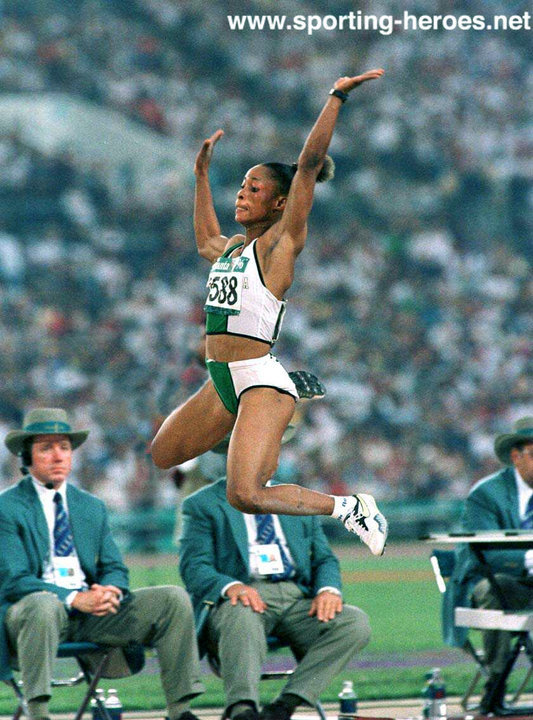

# **1. Importing Dependencies & Dataset**




In [1]:
# For running pandas_profiling
! pip install pandas==0.25.3
! pip install numpy==1.16.5

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport

In [140]:
url = 'https://drive.google.com/file/d/14JRELjf1XUcr791TKgL_rv5hlo2OQzfI/view?usp=sharing'
url= 'https://drive.google.com/uc?id=' + url.split('/')[-2]
athlete_events = pd.read_csv(url)
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# **2. Cleaning Data**

In [141]:
#Dropping columns 
athlete_events.drop(["ID", "Height", "Weight", "Season", "NOC"], axis=1, inplace=True)
athlete_events.head()

,Name,Sex,Age,Team,Games,Year,City,Sport,Event,Medal
0,A Dijiang,M,24.0,China,1992 Summer,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,China,2012 Summer,2012,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,Denmark,1920 Summer,1920,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,1900 Summer,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,Netherlands,1988 Winter,1988,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [142]:
# find all Nigeria Athletes 
NG = athlete_events[ athlete_events['Team'] == 'Nigeria']
NG.head()

,Name,Sex,Age,Team,Games,Year,City,Sport,Event,Medal
211,Adeyemi Abayomi,M,25.0,Nigeria,1972 Summer,1972,Munich,Boxing,Boxing Men's Lightweight,NaN
544,"Lawal Kolawole ""Kola"" Abdulai",M,21.0,Nigeria,1968 Summer,1968,Mexico City,Athletics,Athletics Men's 100 metres,NaN
545,"Lawal Kolawole ""Kola"" Abdulai",M,21.0,Nigeria,1968 Summer,1968,Mexico City,Athletics,Athletics Men's 4 x 100 metres Relay,NaN
546,"Lawal Kolawole ""Kola"" Abdulai",M,25.0,Nigeria,1972 Summer,1972,Munich,Athletics,Athletics Men's 100 metres,NaN
547,"Lawal Kolawole ""Kola"" Abdulai",M,25.0,Nigeria,1972 Summer,1972,Munich,Athletics,Athletics Men's 4 x 100 metres Relay,NaN


# **3. Exploratory Data Analysis**

1. First I count the total number of medal earned by every Nigerian athlete at the Olympics

In [143]:
# find total amount of medals by Nigerian athletes
pd.crosstab(NG["Name"], NG["Medal"], margins=True, margins_name="Total")

Medal,Bronze,Gold,Silver,Total
Name,,,,
Aaron Egbele,1,0,0,1
Abdullahi Shehu,1,0,0,1
Abiodun Olugbemiga Obafemi,0,1,0,1
Agnes Osazuwa (-Olatunji),1,0,0,1
Ambruse Vanzekin,0,0,1,1
...,...,...,...,...
Victor Nosa Ikpeba,0,1,0,1
Victor Nsofor Obinna,0,0,1,1
William Troost-Ekong,1,0,0,1


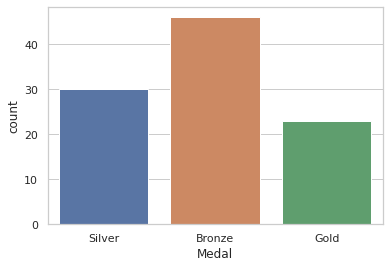

In [144]:
sns.countplot(x = "Medal", data = NG)

# Analysis
i. Nigeria earned a total of **99 Medal**s; **46 Bronze, 23 Gold & 30 Silver Medals** since it first participated in 1952-2020

This is a bar chart of Medals on the x-axis and the number of medals earned on the y-axis

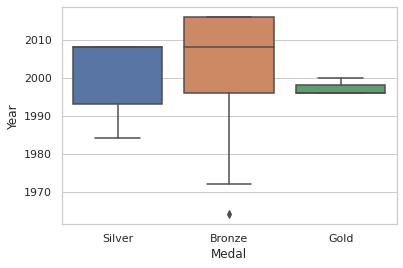

In [145]:
sns.boxplot(x = 'Medal', y = 'Year', data = NG)

ii. The First Medal Nigeria Earned was a Bronze Medal in 1952, and it was Before her Independence.Her First Gold Medal was Earned in 1996. Nigeria has more a Bronze Medal than any other Olympic Medal

This is a candlestick showing the volume of medals earned from 1952-2020 

In [147]:
# find all Nigeria Athletes with Gold Medals 
GoldMedals = NG[NG['Medal'] == 'Gold']
Goldtotal = GoldMedals["Medal"].count()

GoldMedals.head()

,Name,Sex,Age,Team,Games,Year,City,Sport,Event,Medal
2815,Chioma Ajunwa (-Opara),F,24.0,Nigeria,1996 Summer,1996,Atlanta,Athletics,Athletics Women's Long Jump,Gold
6206,Daniel Owofin Amokachi,M,23.0,Nigeria,1996 Summer,1996,Atlanta,Football,Football Men's Football,Gold
6354,Emmanuel Amunike,M,25.0,Nigeria,1996 Summer,1996,Atlanta,Football,Football Men's Football,Gold
11269,Nduka Awazie,M,19.0,Nigeria,2000 Summer,2000,Sydney,Athletics,Athletics Men's 4 x 400 metres Relay,Gold
11766,Tijani Babangida,M,22.0,Nigeria,1996 Summer,1996,Atlanta,Football,Football Men's Football,Gold


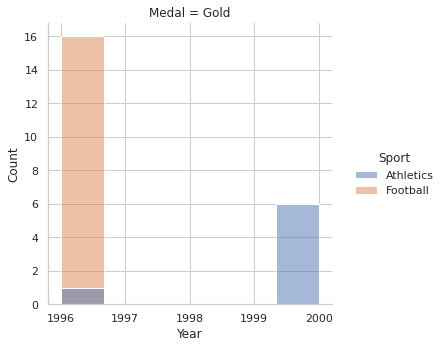

In [148]:
sns.displot(data=GoldMedals, x="Year", hue="Sport", col="Medal")

iii. **Nigeria Earned Olympic Gold Medals in 1996 for Football & Athletics & in 2000 for Athletics** 

In [149]:
# find all Nigeria Athletes with Silver Medals
SilverMedals = NG[ NG['Medal'] == 'Silver']
Silvertotal = SilverMedals["Medal"].count()
SilverMedals.head()

,Name,Sex,Age,Team,Games,Year,City,Sport,Event,Medal
1617,Olubayo Adefemi,M,22.0,Nigeria,2008 Summer,2008,Beijing,Football,Football Men's Football,Silver
1637,"Ayodele ""Dele"" Adeleye",M,19.0,Nigeria,2008 Summer,2008,Beijing,Football,Football Men's Football,Silver
1665,Olapade Charles Adeniken,M,22.0,Nigeria,1992 Summer,1992,Barcelona,Athletics,Athletics Men's 4 x 100 metres Relay,Silver
1968,"Olabisi ""Bisi"" Afolabi",F,20.0,Nigeria,1996 Summer,1996,Atlanta,Athletics,Athletics Women's 4 x 400 metres Relay,Silver
2802,"Ebenezer Oluwafemi ""Femi"" Ajilore",M,23.0,Nigeria,2008 Summer,2008,Beijing,Football,Football Men's Football,Silver


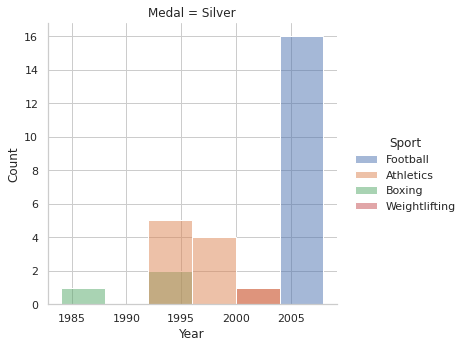

In [150]:
sns.displot(data=SilverMedals, x="Year", hue="Sport", col="Medal")

iv. **Nigeria Earned a Silver Medal in 1984 in boxing; & in Football in 2006** 

In [151]:
# find all Nigeria Athletes with Bronze Medals
BronzeMedals = NG[ NG['Medal'] == 'Bronze']
Bronzetotal = BronzeMedals["Medal"].count()
BronzeMedals.head()

,Name,Sex,Age,Team,Games,Year,City,Sport,Event,Medal
2795,"Oluwafemi ""Junior"" Ajayi",M,20.0,Nigeria,2016 Summer,2016,Rio de Janeiro,Football,Football Men's Football,Bronze
3070,Daniel Akpeyi,M,30.0,Nigeria,2016 Summer,2016,Rio de Janeiro,Football,Football Men's Football,Bronze
4832,Deji Aliu,M,28.0,Nigeria,2004 Summer,2004,Athina,Athletics,Athletics Men's 4 x 100 metres Relay,Bronze
6356,Stanley Amuzie,M,20.0,Nigeria,2016 Summer,2016,Rio de Janeiro,Football,Football Men's Football,Bronze
10838,Musa Audu,M,24.0,Nigeria,2004 Summer,2004,Athina,Athletics,Athletics Men's 4 x 400 metres Relay,Bronze


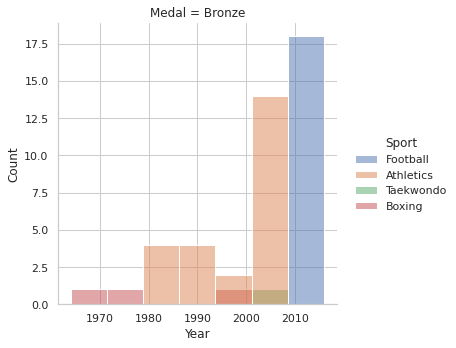

In [152]:
sns.displot(data=BronzeMedals, x="Year", hue="Sport", col="Medal")

v. **Most of Nigeria's Olympic Bronze Medals were Earned in Athletics**

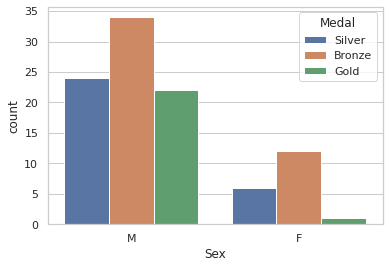

In [162]:
sns.countplot(x = "Sex", hue = "Medal", data = NG)

vi. **More Men from Nigeria have Competed and Earned a Medal (80 Medals: 22 Gold, 24 Silver, 34 Bronze) than Women (19 Medals: 1 Gold, 6 Silver, 12 Bronze)**

In [163]:
pd.crosstab(NG["Medal"], NG["Sex"], margins=True, margins_name="Total")

Sex,F,M,Total
Medal,,,
Bronze,12,34,46
Gold,1,22,23
Silver,6,24,30
Total,19,80,99


In [164]:
pd.crosstab(NG["Medal"], NG["Sport"], margins=True, margins_name="Total")

Sport,Athletics,Boxing,Football,Taekwondo,Weightlifting,Total
Medal,,,,,,
Bronze,24,3,18,1,0,46
Gold,7,0,16,0,0,23
Silver,10,3,16,0,1,30
Total,41,6,50,1,1,99
